# Пример 1. Однопараметрическая линейная регрессия

In [18]:
from tensorflow import keras
from tensorflow.keras import layers

from numpy.random import normal as ND
import matplotlib.pyplot as plt
import numpy as np

## Подготовка данных

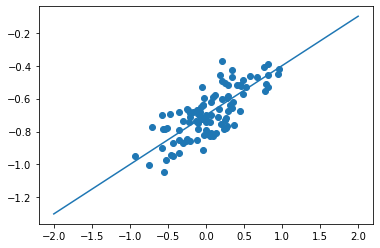

In [19]:
a = 0.3
b = -0.7
x_data = [ND(0,0.4) for _ in range(100)]
y_data = [a*x+b+ND(0,0.1) for x in x_data]
x_init = np.linspace(-2,2)
y_init = [a*x+b for x in x_init]

plt.plot(x_init, y_init)
plt.scatter(x_data, y_data)

## Создание модели

In [20]:
def model_builder():
    model = keras.Sequential([
        layers.Dense(1, activation='linear', input_shape = (1,))
    ])
    
    optimizer = keras.optimizers.SGD()
    
    model.compile(loss = 'mse',
                  optimizer = optimizer)
    return model

In [21]:
model = model_builder()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Обучение

In [23]:
model = model_builder()
EPOCHS = 100

In [24]:
history = model.fit(
  x_data, y_data,
  epochs=EPOCHS, verbose=0)

In [25]:
history.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x7ff7b80500b8>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.4754180908203125,
   0.40591904520988464,
   0.3443174362182617,
   0.29499807953834534,
   0.2533373534679413,
   0.2171250581741333,
   0.1858888566493988,
   0.15968868136405945,
   0.13949352502822876,
   0.12127197533845901,
   0.10469210892915726,
   0.09084894508123398,
   0.07863841950893402,
   0.06868162006139755,
   0.059527136385440826,
   0.05192384123802185,
   0.04604998975992203,
   0.04128408804535866,
   0.03693157061934471,
   0.033241234719753265,
   0.0301230289041996,
   0.02733658067882061,
   0.025214826688170433,
   0.02335336245596409,
   0.021625392138957977,
   0.020319927483797073,
   0.01899656467139721,
   0.018042651936411858,
   0.01686560921370983,
   0.015952466055750847,
   0.01517190970480442,
   0.014743946492671967,
   0.01432779710739851,
   0.01383918616920

In [26]:
? history.model

Signature:       history.model(*args, **kwargs)
Type:           Sequential
String form:    <tensorflow.python.keras.engine.sequential.Sequential object at 0x7ff7b80500b8>
File:           ~/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py
Docstring:     
`Sequential` groups a linear stack of layers into a `tf.keras.Model`.

`Sequential` provides training and inference features on this model.

Examples:

>>> # Optionally, the first layer can receive an `input_shape` argument:
>>> model = tf.keras.Sequential()
>>> model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
>>> # Afterwards, we do automatic shape inference:
>>> model.add(tf.keras.layers.Dense(4))

>>> # This is identical to the following:
>>> model = tf.keras.Sequential()
>>> model.add(tf.keras.Input(shape=(16,)))
>>> model.add(tf.keras.layers.Dense(8))

>>> # Note that you can also omit the `input_shape` argument.
>>> # In that case the model doesn't have any weights until the first call
>>> # to

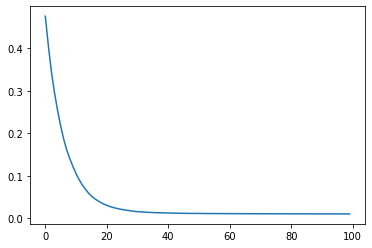

In [27]:
plt.plot(history.epoch, history.history['loss'])

In [28]:
model.get_weights()

[array([[0.23435794]], dtype=float32), array([-0.69782054], dtype=float32)]

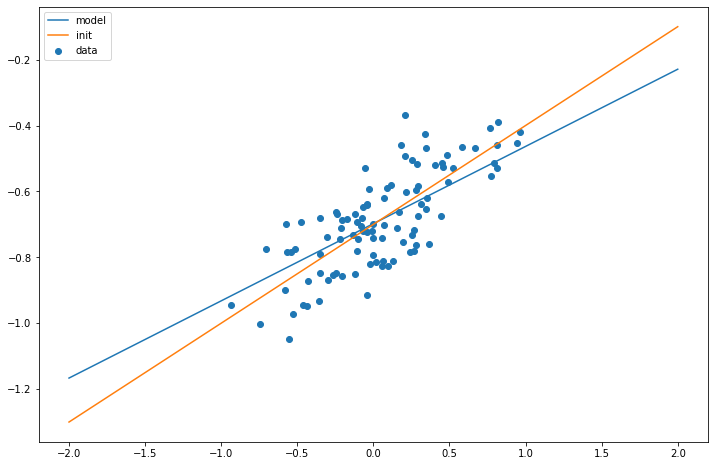

In [29]:
plt.figure(figsize = (12,8))
plt.plot(x_init, model.predict(x_init), label = "model")
plt.plot(x_init, y_init, label = "init")
plt.scatter(x_data, y_data, label = 'data')
plt.legend()